# ⬇️Downloading of DataSheet

In [1]:
import kaggle
import zipfile

In [2]:
!kaggle datasets download aslawant/superhero-movies-dataset

Dataset URL: https://www.kaggle.com/datasets/aslawant/superhero-movies-dataset
License(s): MIT
superhero-movies-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
with zipfile.ZipFile("superhero-movies-dataset.zip",'r') as f:
    f.extractall()

### Loading of DataSheet

In [4]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv("superhero_movies_dataset.csv")

### Understanding the data info

In [6]:
df.head()

,Year,Film,Publisher,Director,Distributor,Worldwide_Gross,Description
0,1937,The Shadow Strikes,Street & Smith,Lynn Shores,Grand National Films Inc.,NaN,Film featuring The Shadow character.
1,1938,International Crime,Street & Smith,Charles Lamont,Grand National Films Inc.,NaN,Film featuring The Shadow character.
2,1945,Dick Tracy,Detroit Mirror,William Berke,RKO Pictures,NaN,Film featuring the character Dick Tracy.
3,1946,The Shadow Returns',Street & Smith,"Phil Rosen, William Beaudine",Monogram Pictures,NaN,Part of The Shadow franchise.
4,1946,Behind the Mask',Street & Smith,Phil Karlson,Monogram Pictures,NaN,Film featuring The Shadow character.


In [7]:
df.describe()

,Year
count,407.000000
mean,2002.368550
std,16.081896
min,1937.000000
25%,1994.000000
50%,2005.000000
75%,2014.000000
max,2025.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             407 non-null    int64 
 1   Film             407 non-null    object
 2   Publisher        407 non-null    object
 3   Director         407 non-null    object
 4   Distributor      407 non-null    object
 5   Worldwide_Gross  279 non-null    object
 6   Description      295 non-null    object
dtypes: int64(1), object(6)
memory usage: 22.4+ KB


## 🧽Cleaning the Data

In [9]:
df.rename(columns={'Worldwide_Gross':'Worldwide_Gross(USD,Million)'},inplace=True)

In [10]:
df['Worldwide_Gross(USD,Million)']=df['Worldwide_Gross(USD,Million)'].str.replace(r'\D',"" ,regex=True)

In [11]:
df['Worldwide_Gross(USD,Million)']=df['Worldwide_Gross(USD,Million)'].replace('', np.nan)

In [12]:
df['Worldwide_Gross(USD,Million)']=df['Worldwide_Gross(USD,Million)'].astype('float64')

In [13]:
df['Worldwide_Gross(USD,Million)'] = df['Worldwide_Gross(USD,Million)'].apply(lambda x: f"{x/1e6:.5f}")

In [14]:
df.head()

,Year,Film,Publisher,Director,Distributor,"Worldwide_Gross(USD,Million)",Description
0,1937,The Shadow Strikes,Street & Smith,Lynn Shores,Grand National Films Inc.,nan,Film featuring The Shadow character.
1,1938,International Crime,Street & Smith,Charles Lamont,Grand National Films Inc.,nan,Film featuring The Shadow character.
2,1945,Dick Tracy,Detroit Mirror,William Berke,RKO Pictures,nan,Film featuring the character Dick Tracy.
3,1946,The Shadow Returns',Street & Smith,"Phil Rosen, William Beaudine",Monogram Pictures,nan,Part of The Shadow franchise.
4,1946,Behind the Mask',Street & Smith,Phil Karlson,Monogram Pictures,nan,Film featuring The Shadow character.


In [15]:
df[df['Publisher']=='Street & Smith']

,Year,Film,Publisher,Director,Distributor,"Worldwide_Gross(USD,Million)",Description
0,1937,The Shadow Strikes,Street & Smith,Lynn Shores,Grand National Films Inc.,nan,Film featuring The Shadow character.
1,1938,International Crime,Street & Smith,Charles Lamont,Grand National Films Inc.,nan,Film featuring The Shadow character.
3,1946,The Shadow Returns',Street & Smith,"Phil Rosen, William Beaudine",Monogram Pictures,nan,Part of The Shadow franchise.
4,1946,Behind the Mask',Street & Smith,Phil Karlson,Monogram Pictures,nan,Film featuring The Shadow character.
6,1946,The Missing Lady',Street & Smith,Phil Karlson,Monogram Pictures,nan,Part of The Shadow franchise.
11,1958,Invisible Avenger',Street & Smith,"James Wong Howe, Ben Parker, John Sledge",Paramount Pictures (Republic Pictures),nan,Part of The Shadow franchise.
18,1975,Doc Savage: The Man of Bronze',Street & Smith,Michael Anderson,Warner Bros.,nan,Film based on the pulp comic Doc Savage.
101,1994,The Shadow',Street & Smith,Russell Mulcahy,Universal Pictures,48.06343,NaN


In [16]:
df['Worldwide_Gross(USD,Million)']=df['Worldwide_Gross(USD,Million)'].str.replace(r'[^\d.]',"" ,regex=True)

In [17]:
df['Worldwide_Gross(USD,Million)']=pd.to_numeric(df['Worldwide_Gross(USD,Million)'], errors='coerce')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          407 non-null    int64  
 1   Film                          407 non-null    object 
 2   Publisher                     407 non-null    object 
 3   Director                      407 non-null    object 
 4   Distributor                   407 non-null    object 
 5   Worldwide_Gross(USD,Million)  274 non-null    float64
 6   Description                   295 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 22.4+ KB


In [19]:
def normalize_gross(val):
    if pd.isna(val):
        return 
    elif val > 1e6:
        return val/1e3
    elif val > 1e3:
        return val/10
    return val
df['Worldwide_Gross(USD,Million)'] = df['Worldwide_Gross(USD,Million)'].apply(normalize_gross)

## Featuring

##### 1. Top-grossing movies

In [20]:
df.sort_values('Worldwide_Gross(USD,Million)',ascending=False).head(10)

,Year,Film,Publisher,Director,Distributor,"Worldwide_Gross(USD,Million)",Description
330,2017,Star Wars: The Last Jedi,Original,Rian Johnson,Walt Disney Studios Motion Pictures (Lucasfilm),1333.0,Sequel to Star Wars: The Force Awakens. Part o...
358,2019,Star Wars: The Rise of Skywalker,Original,J.J. Abrams,Walt Disney Studios Motion Pictures (Lucasfilm),1074.0,Sequel to Star Wars: The Last Jedi. Part of th...
97,1994,Street Fighter,Capcom,Steven E. de Souza,Universal Pictures,994.0,Film based on the Street Fighter video game fr...
297,2013,Riddick,Original,David Twohy,Universal Pictures,983.0,Part of The Chronicles of Riddick franchise.
189,2003,Underworld,Original,Len Wiseman,Sony Pictures (Screen Gems),957.0,NaN
242,2008,Speed Racer,Shueisha,The Wachowskis,Warner Bros. Pictures,939.0,Film based on the Speed Racer franchise.
254,2009,Underworld: Rise of the Lycans,Original,Patrick Tatopoulos,Sony Pictures (Screen Gems),914.0,Prequel to Underworld.
207,2005,Star Wars: Episode III – Revenge of the Sith,Original,George Lucas,Walt Disney Studios Motion Pictures (20th Cent...,868.4,Part of the Star Wars franchise.
276,2011,Spy Kids: All the Time in the World,Original,Robert Rodriguez,The Weinstein Company,856.0,Part of the Spy Kids film series.
371,2021,Mortal Kombat,Warner Bros. Interactive Entertainment,Simon McQuoid,Warner Bros. Pictures (New Line Cinema),837.0,Film based on the Mortal Kombat video game fra...


##### 2. Top-grossing Year

In [21]:
df.groupby('Year')['Worldwide_Gross(USD,Million)'].sum().sort_values(ascending=False).head(10)

Year
2003    4465.982161
2017    3277.408660
2008    3249.600030
2019    3147.423560
2009    3105.388100
2014    2660.769790
2016    2372.235030
2011    2328.995702
2005    2193.965680
2013    2131.500000
Name: Worldwide_Gross(USD,Million), dtype: float64

In [22]:
df.groupby('Publisher')['Worldwide_Gross(USD,Million)'].sum().sort_values(ascending=False).head(10)


Publisher
Original                                  38532.919893
Hasbro                                     3948.509123
Shueisha                                   1996.472570
Capcom                                     1993.545960
Toho                                       1954.142320
Weird Tales                                1452.000000
Mirage Studios                             1433.987410
Sega Sammy Group                           1217.979540
Warner Bros. Interactive Entertainment      837.000000
Kevin Grevioux                              768.000000
Name: Worldwide_Gross(USD,Million), dtype: float64

## 🔍 Visual Insights from the Dataset


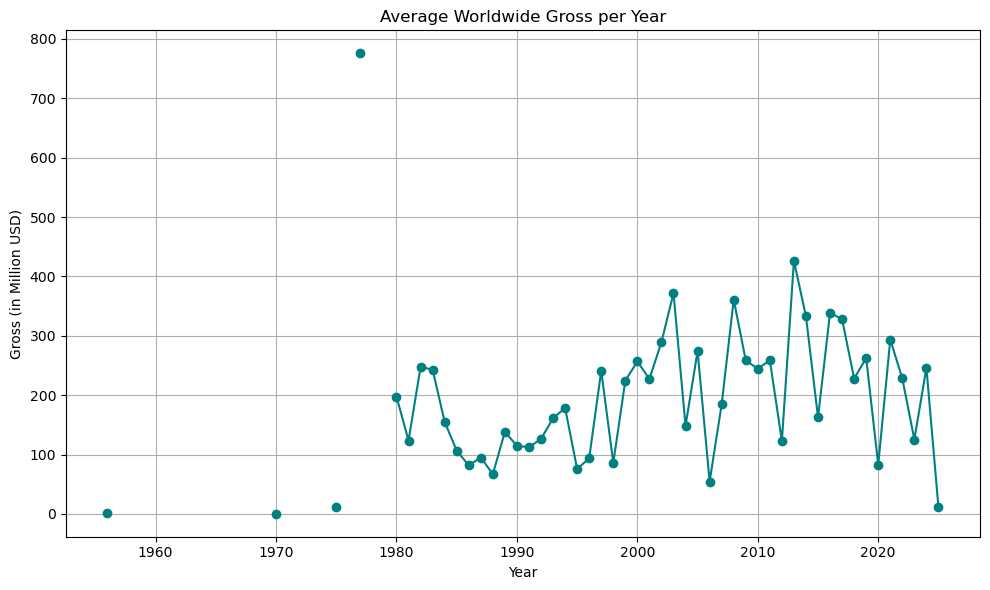

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df.groupby('Year')['Worldwide_Gross(USD,Million)'].mean().plot(kind='line', marker='o', color='teal')
plt.title('Average Worldwide Gross per Year')
plt.xlabel('Year')
plt.ylabel('Gross (in Million USD)')
plt.grid(True)
plt.tight_layout()
plt.show()



In [24]:
df['Publisher'].value_counts().head(10)

Publisher
Original          280
Hasbro             13
Street & Smith      8
Capcom              7
Mirage Studios      5
Shueisha            5
Detroit Mirror      5
Caliber Comics      5
WXYT (AM)           5
Toho                4
Name: count, dtype: int64

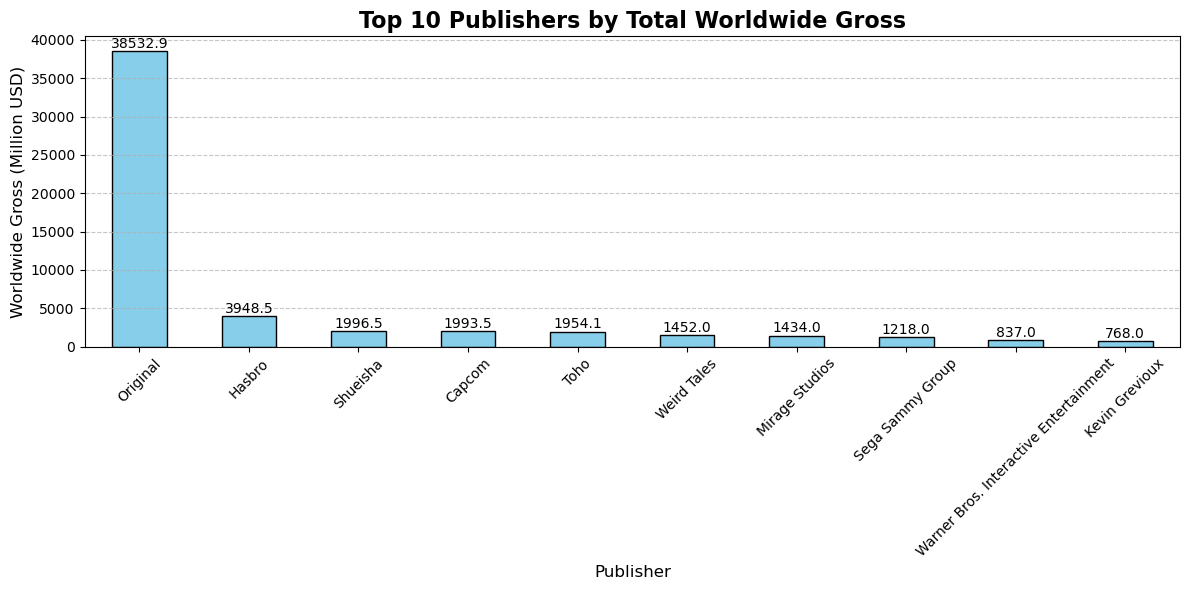

In [25]:
top_publishers = (
    df.groupby('Publisher')['Worldwide_Gross(USD,Million)']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

ax = top_publishers.plot(
    kind='bar',
    figsize=(12, 6),
    color='skyblue',
    edgecolor='black'
)

ax.set_title('Top 10 Publishers by Total Worldwide Gross', fontsize=16, fontweight='bold')
ax.set_xlabel('Publisher', fontsize=12)
ax.set_ylabel('Worldwide Gross (Million USD)', fontsize=12)
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(top_publishers):
    ax.text(i, value + 5, f'{value:.1f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


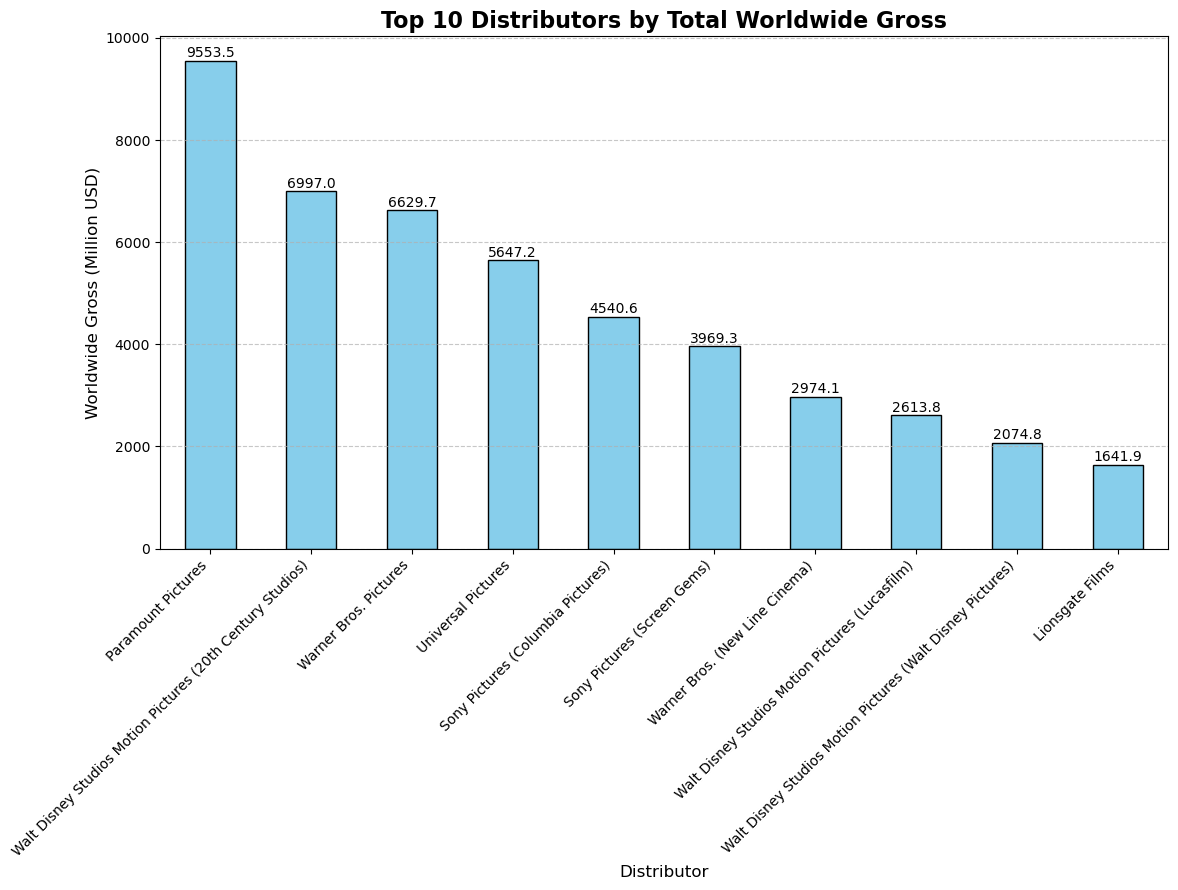

In [26]:
top_distributors = (
    df.groupby('Distributor')['Worldwide_Gross(USD,Million)']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

ax = top_distributors.plot(
    kind='bar',
    figsize=(12, 9),
    color='skyblue',
    edgecolor='black'
)

ax.set_title('Top 10 Distributors by Total Worldwide Gross', fontsize=16, fontweight='bold')
ax.set_xlabel('Distributor', fontsize=12)
ax.set_ylabel('Worldwide Gross (Million USD)', fontsize=12)
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xticklabels(top_distributors.index, rotation=45, ha='right')
for i, value in enumerate(top_distributors):
    ax.text(i, value + 5, f'{value:.1f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


<Axes: xlabel='Year', ylabel='Distributor'>

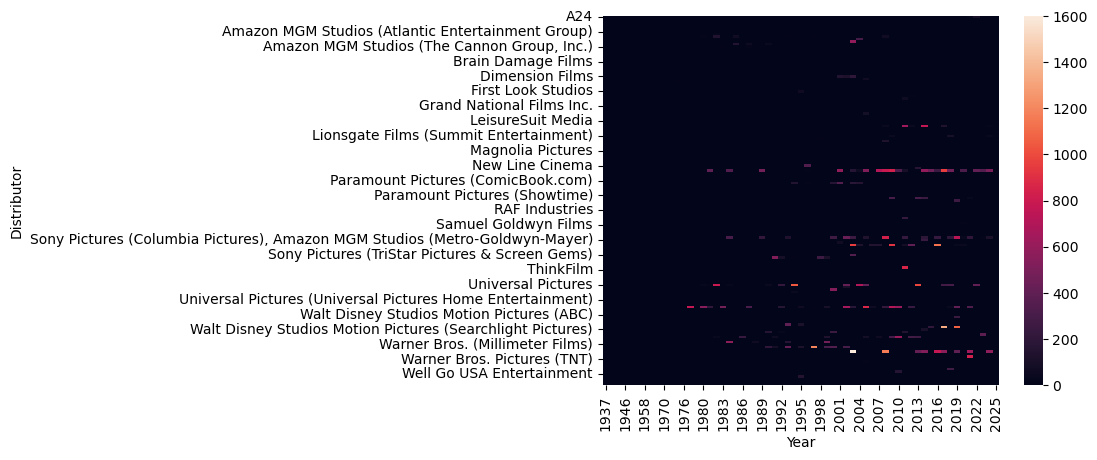

In [27]:
import seaborn as sns
pivot = df.pivot_table(index='Distributor', columns='Year', values='Worldwide_Gross(USD,Million)', aggfunc='sum')
sns.heatmap(pivot.fillna(0))

In [28]:
df['Distributor'].value_counts().head(10)


Distributor
Paramount Pictures                                            28
Walt Disney Studios Motion Pictures (20th Century Studios)    24
Sony Pictures (Columbia Pictures)                             21
Universal Pictures                                            20
Warner Bros. Pictures                                         15
Sony Pictures (Screen Gems)                                   13
Warner Bros. (New Line Cinema)                                13
Walt Disney Studios Motion Pictures (Walt Disney Pictures)    13
—                                                              9
Paramount Pictures (Miramax)                                   8
Name: count, dtype: int64

In [29]:
df_2017 = df[df['Year'] == 2017]

In [30]:
distributor_share = df_2017.groupby('Distributor')['Worldwide_Gross(USD,Million)'].sum()

In [31]:
top_distributor=distributor_share.nlargest(5)

In [32]:
others_sum=distributor_share.sum() - top_distributor.sum()
final_share = top_distributor.copy()
final_share['Others'] = others_sum

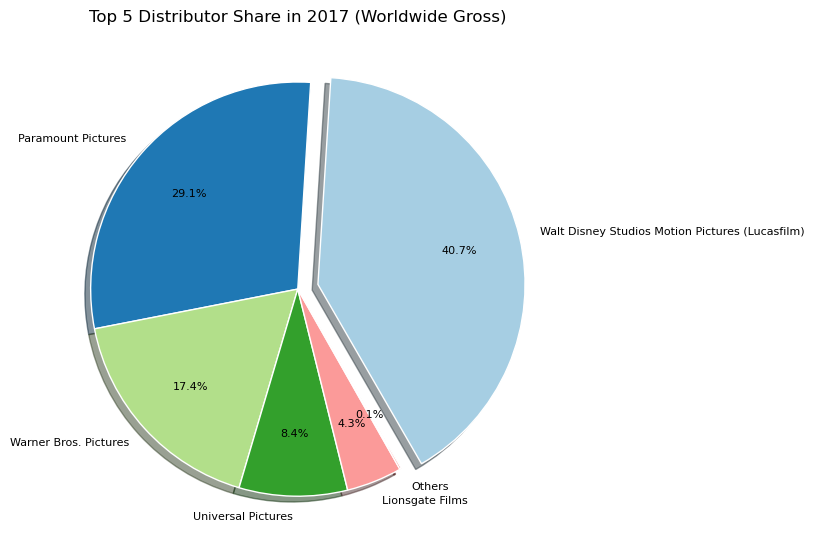

In [33]:
import matplotlib.pyplot as plt
explode = [0.1] + [0] * (len(final_share) - 1)
plt.figure(figsize=(8,8))
final_share.plot.pie(autopct='%1.1f%%',startangle=-60,
    colors=plt.cm.Paired.colors,pctdistance=0.7,
    labeldistance=1.1,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},textprops={'fontsize': 8},
    shadow=True,explode=explode)
plt.title("Top 5 Distributor Share in 2017 (Worldwide Gross)")
plt.ylabel("")  # Remove y-label
plt.tight_layout()
plt.show()

## 📌 Key Insights
- 🎬 This is a **sample dataset from Kaggle** representing SuperHero movies performance across publishers and years.
- 📊 The dataset was cleaned by handling missing values (e.g., empty gross values).
- 🎬 The SuperHero movie industry saw the highest average worldwide gross around 2010–2020.
- 🏆 Publishers like *Original* and *Hasbro* dominated total worldwide gross earnings.
- 📈 The trend of worldwide gross earnings has fluctuated year by year, with a slight decline after 2020.
- 💸 Some publishers consistently performed well over the years, while others had one-hit wonders.
- 🔍 There were several missing values in the dataset which were handled before analysis.
